In [1]:
import pickle
import pandas as pd
import lightgbm as lgb
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold

In [2]:
X = pd.read_pickle('/kaggle/input/amex-imputed-aggregate-data/X_train_agg.pkl', compression='gzip')
y = pd.read_pickle('/kaggle/input/amex-imputed-aggregate-data/y_train_agg.pkl', compression='gzip')
test = pd.read_pickle('/kaggle/input/amex-imputed-aggregate-data/X_test_agg.pkl', compression='gzip')

Function to calculate competition's evaluation metric: https://www.kaggle.com/code/inversion/amex-competition-metric-python

In [3]:
def amex_metric(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:

    def top_four_percent_captured(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        df = (pd.concat([y_true, y_pred], axis='columns')
              .sort_values('prediction', ascending=False))
        df['weight'] = df['target'].apply(lambda x: 20 if x==0 else 1)
        four_pct_cutoff = int(0.04 * df['weight'].sum())
        df['weight_cumsum'] = df['weight'].cumsum()
        df_cutoff = df.loc[df['weight_cumsum'] <= four_pct_cutoff]
        return (df_cutoff['target'] == 1).sum() / (df['target'] == 1).sum()
        
    def weighted_gini(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        df = (pd.concat([y_true, y_pred], axis='columns')
              .sort_values('prediction', ascending=False))
        df['weight'] = df['target'].apply(lambda x: 20 if x==0 else 1)
        df['random'] = (df['weight'] / df['weight'].sum()).cumsum()
        total_pos = (df['target'] * df['weight']).sum()
        df['cum_pos_found'] = (df['target'] * df['weight']).cumsum()
        df['lorentz'] = df['cum_pos_found'] / total_pos
        df['gini'] = (df['lorentz'] - df['random']) * df['weight']
        return df['gini'].sum()

    def normalized_weighted_gini(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        y_true_pred = y_true.rename(columns={'target': 'prediction'})
        return weighted_gini(y_true, y_pred) / weighted_gini(y_true, y_true_pred)

    g = normalized_weighted_gini(y_true, y_pred)
    d = top_four_percent_captured(y_true, y_pred)

    return 0.5 * (g + d)

## Use StratifiedKFold() to train and predict on val and test sets


Fold 1
[1]	training's auc: 0.929943	training's binary_logloss: 0.556339	valid_1's auc: 0.929723	valid_1's binary_logloss: 0.556375
[2]	training's auc: 0.939182	training's binary_logloss: 0.54256	valid_1's auc: 0.938889	valid_1's binary_logloss: 0.542581
[3]	training's auc: 0.941238	training's binary_logloss: 0.529806	valid_1's auc: 0.941097	valid_1's binary_logloss: 0.529879
[4]	training's auc: 0.94442	training's binary_logloss: 0.517316	valid_1's auc: 0.944239	valid_1's binary_logloss: 0.517443
[5]	training's auc: 0.945955	training's binary_logloss: 0.505905	valid_1's auc: 0.945727	valid_1's binary_logloss: 0.506069
[6]	training's auc: 0.946472	training's binary_logloss: 0.495364	valid_1's auc: 0.946149	valid_1's binary_logloss: 0.495575
[7]	training's auc: 0.947057	training's binary_logloss: 0.485073	valid_1's auc: 0.946576	valid_1's binary_logloss: 0.48535
[8]	training's auc: 0.94715	training's binary_logloss: 0.475639	valid_1's auc: 0.946746	valid_1's binary_logloss: 0.475901
[9]	

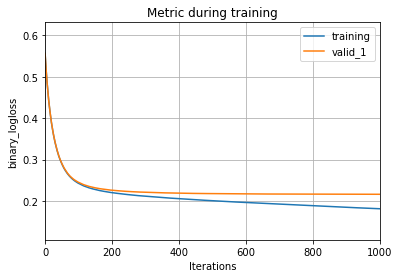


Fold 2
[1]	training's auc: 0.92981	training's binary_logloss: 0.556386	valid_1's auc: 0.928265	valid_1's binary_logloss: 0.556458
[2]	training's auc: 0.939427	training's binary_logloss: 0.54257	valid_1's auc: 0.937571	valid_1's binary_logloss: 0.542761
[3]	training's auc: 0.941616	training's binary_logloss: 0.529777	valid_1's auc: 0.93942	valid_1's binary_logloss: 0.530057
[4]	training's auc: 0.944837	training's binary_logloss: 0.517236	valid_1's auc: 0.942503	valid_1's binary_logloss: 0.517626
[5]	training's auc: 0.946288	training's binary_logloss: 0.505787	valid_1's auc: 0.944013	valid_1's binary_logloss: 0.50629
[6]	training's auc: 0.946716	training's binary_logloss: 0.495257	valid_1's auc: 0.944629	valid_1's binary_logloss: 0.495822
[7]	training's auc: 0.947343	training's binary_logloss: 0.484964	valid_1's auc: 0.945336	valid_1's binary_logloss: 0.485596
[8]	training's auc: 0.947269	training's binary_logloss: 0.47553	valid_1's auc: 0.945368	valid_1's binary_logloss: 0.476191
[9]	t

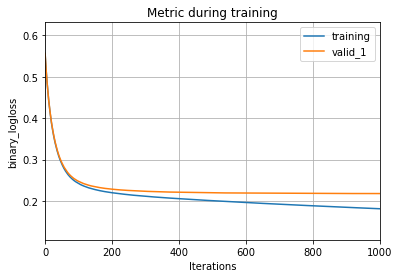


Fold 3
[1]	training's auc: 0.932434	training's binary_logloss: 0.556102	valid_1's auc: 0.931276	valid_1's binary_logloss: 0.556155
[2]	training's auc: 0.9402	training's binary_logloss: 0.542052	valid_1's auc: 0.939306	valid_1's binary_logloss: 0.542127
[3]	training's auc: 0.942007	training's binary_logloss: 0.528941	valid_1's auc: 0.941394	valid_1's binary_logloss: 0.529024
[4]	training's auc: 0.942941	training's binary_logloss: 0.516425	valid_1's auc: 0.942071	valid_1's binary_logloss: 0.516579
[5]	training's auc: 0.944608	training's binary_logloss: 0.504982	valid_1's auc: 0.943599	valid_1's binary_logloss: 0.505229
[6]	training's auc: 0.94524	training's binary_logloss: 0.494624	valid_1's auc: 0.944114	valid_1's binary_logloss: 0.49494
[7]	training's auc: 0.945186	training's binary_logloss: 0.484597	valid_1's auc: 0.944046	valid_1's binary_logloss: 0.484947
[8]	training's auc: 0.946254	training's binary_logloss: 0.474855	valid_1's auc: 0.945044	valid_1's binary_logloss: 0.475237
[9]	

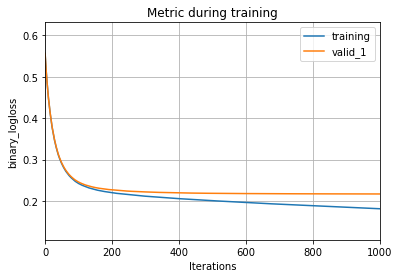


Fold 4
[1]	training's auc: 0.932482	training's binary_logloss: 0.556106	valid_1's auc: 0.930589	valid_1's binary_logloss: 0.556197
[2]	training's auc: 0.940245	training's binary_logloss: 0.542017	valid_1's auc: 0.938824	valid_1's binary_logloss: 0.542163
[3]	training's auc: 0.942036	training's binary_logloss: 0.528907	valid_1's auc: 0.940501	valid_1's binary_logloss: 0.529147
[4]	training's auc: 0.942893	training's binary_logloss: 0.516365	valid_1's auc: 0.941509	valid_1's binary_logloss: 0.516663
[5]	training's auc: 0.944532	training's binary_logloss: 0.504912	valid_1's auc: 0.943166	valid_1's binary_logloss: 0.505277
[6]	training's auc: 0.945043	training's binary_logloss: 0.494577	valid_1's auc: 0.943799	valid_1's binary_logloss: 0.494972
[7]	training's auc: 0.945096	training's binary_logloss: 0.484539	valid_1's auc: 0.943807	valid_1's binary_logloss: 0.484988
[8]	training's auc: 0.946156	training's binary_logloss: 0.474809	valid_1's auc: 0.944987	valid_1's binary_logloss: 0.475282


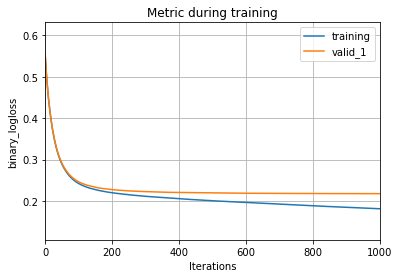


Fold 5
[1]	training's auc: 0.92235	training's binary_logloss: 0.556826	valid_1's auc: 0.921899	valid_1's binary_logloss: 0.556891
[2]	training's auc: 0.93753	training's binary_logloss: 0.542782	valid_1's auc: 0.937142	valid_1's binary_logloss: 0.542877
[3]	training's auc: 0.944477	training's binary_logloss: 0.528829	valid_1's auc: 0.943778	valid_1's binary_logloss: 0.528982
[4]	training's auc: 0.946335	training's binary_logloss: 0.516691	valid_1's auc: 0.945301	valid_1's binary_logloss: 0.516936
[5]	training's auc: 0.946296	training's binary_logloss: 0.50548	valid_1's auc: 0.945272	valid_1's binary_logloss: 0.505749
[6]	training's auc: 0.947147	training's binary_logloss: 0.494547	valid_1's auc: 0.946111	valid_1's binary_logloss: 0.494867
[7]	training's auc: 0.946969	training's binary_logloss: 0.484433	valid_1's auc: 0.945851	valid_1's binary_logloss: 0.484843
[8]	training's auc: 0.947982	training's binary_logloss: 0.473963	valid_1's auc: 0.946864	valid_1's binary_logloss: 0.474433
[9]

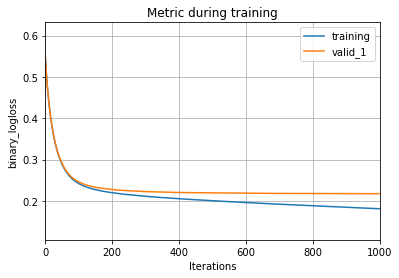

In [4]:
num_folds = 5
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=25)

val_preds = np.zeros(X.shape[0])
val_class = np.zeros(X.shape[0])
test_preds = np.zeros(test.shape[0])

for fold, (train_index, val_index) in enumerate(skf.split(X, y)):
    print(f'\nFold {fold + 1}')
    
    # allocate train and val sets using fold split indices 
    X_train, X_val = (X.iloc[train_index].reset_index(drop=True), X.iloc[val_index].reset_index(drop=True))
    y_train, y_val = (y.iloc[train_index].reset_index(drop=True), y.iloc[val_index].reset_index(drop=True))
    
    
    
    # define and train model
    model = lgb.LGBMClassifier(
        objective='binary',
        n_estimators=1000,
        num_leaves=50,
        learning_rate=0.03,
        colsample_bytree=0.1,
        min_child_samples=2000,
        max_bins=500,
        reg_alpha=2,
        random_state=25
    )
    model = model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)], eval_metric=['auc'])
    
    # plot loss and AUC during fit 
    plot = lgb.plot_metric(model, metric='binary_logloss')
    plt.show()
    
    # predict on val set
    val_preds[val_index] = val_preds[val_index] + model.predict_proba(X_val)[:,1]
    val_class[val_index] = val_class[val_index] + model.predict(X_val)
    
    # predict on this fold's section of test set 
    test_proba = model.predict_proba(test)[:, 1]
    test_preds = test_preds + test_proba / num_folds

In [5]:
# use validation preds to get val M score
y_preds = pd.DataFrame(y).copy(deep=True)
y_preds = y_preds.rename(columns={"target": "prediction"})
y_preds['prediction'] = val_preds

# print M score and class report 
print(f'\nM score: {amex_metric(pd.DataFrame(y), y_preds)}')
print(f'\n{classification_report(y, val_class)}')


M score: 0.7920069386936385

              precision    recall  f1-score   support

           0       0.93      0.94      0.94    340085
           1       0.82      0.81      0.81    118828

    accuracy                           0.90    458913
   macro avg       0.88      0.87      0.87    458913
weighted avg       0.90      0.90      0.90    458913



## Generate submission

Note: since there are multiple models (one per fold), one model can't be exported like our other models

In [6]:
test['prediction'] = test_preds
test = test[['prediction']]

# submission can't have index 
test = test.reset_index()
test.to_csv('lgbm_sumbission.csv', index=False)